In [1]:
import glob, os
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter

# Raw data import

In [2]:
cleaned_path = '../dataset/cleaned/'
raw_path = '../dataset/McGill-Billboard/'
files = glob.glob(raw_path + '/**/*.txt', recursive=True)

In [15]:
# Convert letter keys into numeric values, relative to the tonic
def key2num(string):
    return (string.replace('A#', '1').replace('Ab', '11')
            .replace('B#', '3').replace('Bb', '1')
            .replace('C#', '4').replace('Cb', '2')
            .replace('D#', '6').replace('Db', '4')
            .replace('E#', '8').replace('Eb', '6')
            .replace('F#', '9').replace('Fb', '7')
            .replace('G#', '11').replace('Gb', '9')
            .replace('A', '0')
            .replace('B', '2')
            .replace('C', '3')
            .replace('D', '5')
            .replace('E', '7')
            .replace('F', '8')
            .replace('G', '10'))

In [140]:
# Get all the raw data into a python list
all_data = np.empty((890, 3), dtype=object)
all_num_data = np.empty((890, 2), dtype=object)

for i in range(len(files)):

    with open(files[i], 'r') as myfile:
        data = myfile.read().replace('\n', ' ').replace('\t', ' ')
        num_data = key2num(data)       
        
    index = re.findall(r'\d+',file)[0]
    chord_list = re.findall("[^ ]+:[^ ]+", data)
    tonic = re.findall("tonic: .", data)[0].replace("tonic: ", "")
    
    num_tonic = int(re.findall("tonic: [^ ]+", num_data)[0].replace("tonic: ", ""))
    num_chord_list1 = re.findall("[0-9]+:", num_data)
    num_chord_list1 = [(int(element.replace(":", ""))-num_tonic)%12 for element in num_chord_list1]
    num_chord_list2 = re.findall(":[^ ]+", num_data)
    num_chord_list2 = [element.replace(":", "") for element in num_chord_list2]    
    
    all_data[i] =  (index, tonic, chord_list)
    all_num_data[i] = (index, np.dstack((num_chord_list1, num_chord_list2))[0])

In [141]:
all_num_data

array([['0003',
        array([['9', 'min'],
       ['9', 'min'],
       ['0', 'maj'],
       ['0', 'maj'],
       ['9', 'min'],
       ['9', 'min'],
       ['0', 'maj'],
       ['0', 'maj'],
       ['9', 'min'],
       ['9', 'min'],
       ['0', 'maj'],
       ['0', 'maj'],
       ['9', 'min'],
       ['9', 'min'],
       ['0', 'maj'],
       ['0', 'maj'],
       ['9', 'min'],
       ['9', 'min'],
       ['0', 'maj'],
       ['0', 'maj'],
       ['5', 'maj'],
       ['5', 'maj'],
       ['2', 'maj'],
       ['2', 'maj'],
       ['7', 'maj'],
       ['7', 'maj'],
       ['0', 'maj'],
       ['0', 'maj'],
       ['9', 'maj'],
       ['9', 'maj'],
       ['0', 'maj'],
       ['0', 'maj'],
       ['9', 'maj'],
       ['9', 'maj'],
       ['0', 'maj'],
       ['0', 'maj'],
       ['5', 'maj'],
       ['5', 'maj'],
       ['2', 'maj'],
       ['2', 'maj'],
       ['7', 'maj'],
       ['7', 'maj'],
       ['0', 'maj'],
       ['0', 'maj'],
       ['9', 'min'],
       ['9', 'min'],
       ['0

# Preprocessing

In [6]:
import csv

with open('../dataset/index.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    csv_list = list(csv_reader)

# Data Visualization

In [142]:
print('Number of songs in the dataset : ', len(all_data))

Number of songs in the dataset :  890


In [143]:
# This is the number of chords per chord progression
song_len = [len(all_data[i][2]) for i in range(len(all_data))]

Text(0.5,1,'Repartition of song lengths')

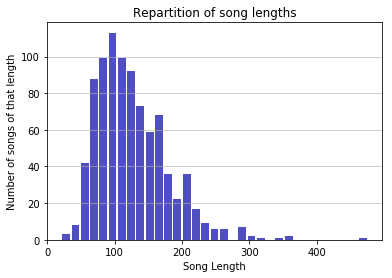

In [144]:
plt.figure()
plt.rcParams["figure.figsize"] = (15,7)

n, bins, patches = plt.hist(x=song_len, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Song Length')
plt.ylabel('Number of songs of that length')
plt.title('Repartition of song lengths')

In [145]:
root_notes = [all_data[i][1] for i in range(len(all_data))]

In [146]:
root_notes_index = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
root_notes_count = np.zeros(7)
for note in root_notes:
    for i in range(7):
        if note==root_notes_index[i]:
            root_notes_count[i] += 1

Text(0.5,1,'Repartition of the songs depending on the root notes')

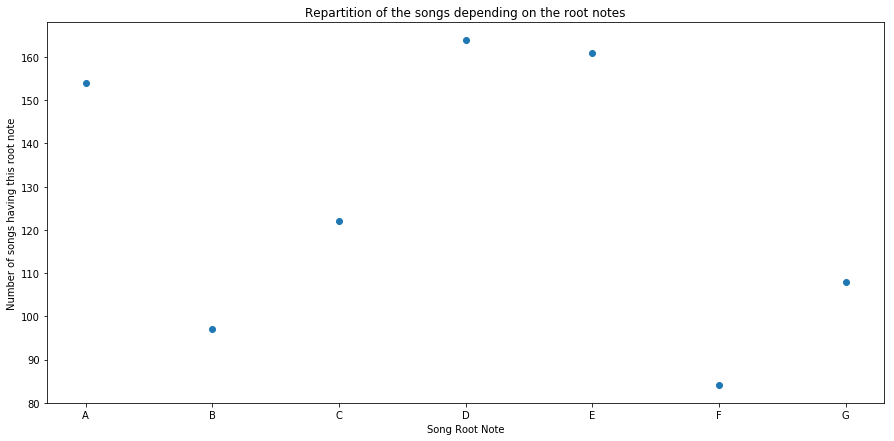

In [147]:
plt.figure()
plt.rcParams["figure.figsize"] = (15,7)

plt.scatter(range(7),root_notes_count)
plt.xticks(np.arange(7), ('A', 'B', 'C', 'D', 'E', 'F', 'G'))
plt.xlabel('Song Root Note')
plt.ylabel('Number of songs having this root note')
plt.title('Repartition of the songs depending on the root notes')

In [148]:
first_chords = np.zeros(890)
second_chords = np.zeros(890)
third_chords = np.zeros(890)
for k in range(890):
    progression = all_data[k][2]
    collection = Counter(progression)
    
    most_common = collection.most_common(3)
    first_chords[k] = most_common[0][1]
    if len(most_common)>1:
        second_chords[k] = most_common[1][1]
    else:
        second_chords[k] = 0
    if len(most_common)>2:
        third_chords[k] = most_common[2][1]
    else:
        third_chords[k] = 0

Text(0.5,1,'Proportion of the chords that are the most numerous chord')

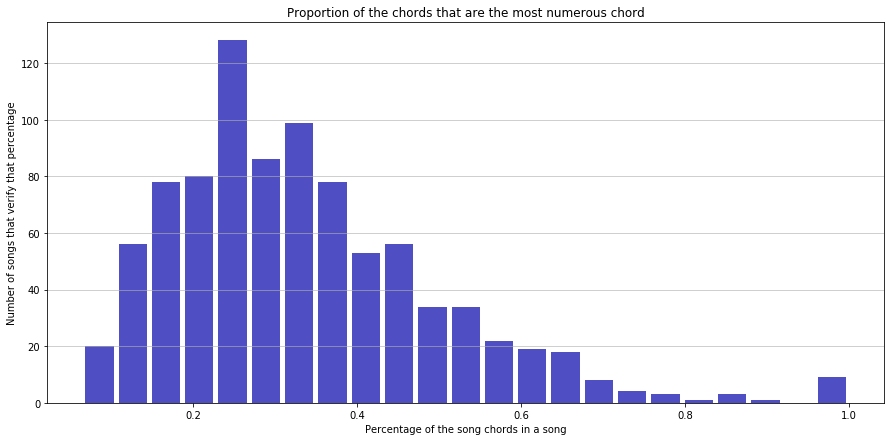

In [149]:
plt.figure()
plt.rcParams["figure.figsize"] = (15,7)

n, bins, patches = plt.hist(x=first_chords/song_len, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Percentage of the song chords in a song')
plt.ylabel('Number of songs that verify that percentage')
plt.title('Proportion of the chords that are the most numerous chord')

Text(0.5,1,'Proportion of the chords that are the second most numerous chord')

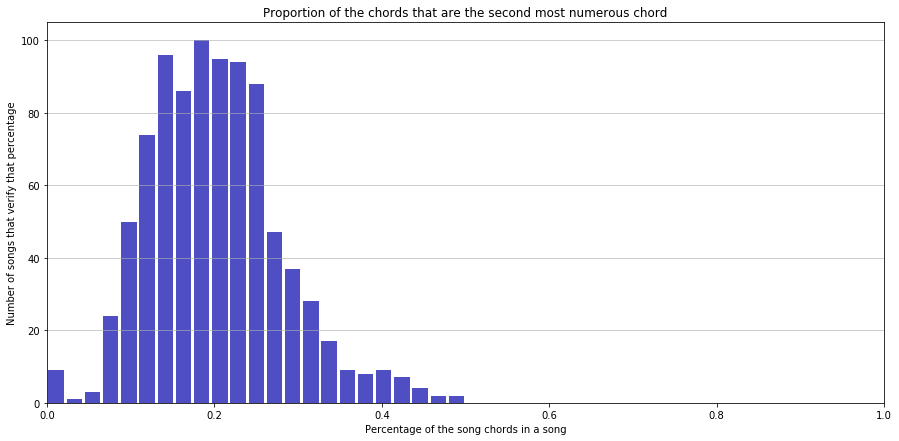

In [150]:
plt.figure()
plt.rcParams["figure.figsize"] = (15,7)

n, bins, patches = plt.hist(x=second_chords/song_len, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlim(0.0,1.0)
plt.xlabel('Percentage of the song chords in a song')
plt.ylabel('Number of songs that verify that percentage')
plt.title('Proportion of the chords that are the second most numerous chord')

Text(0.5,1,'Proportion of the chords that are the third most numerous chord')

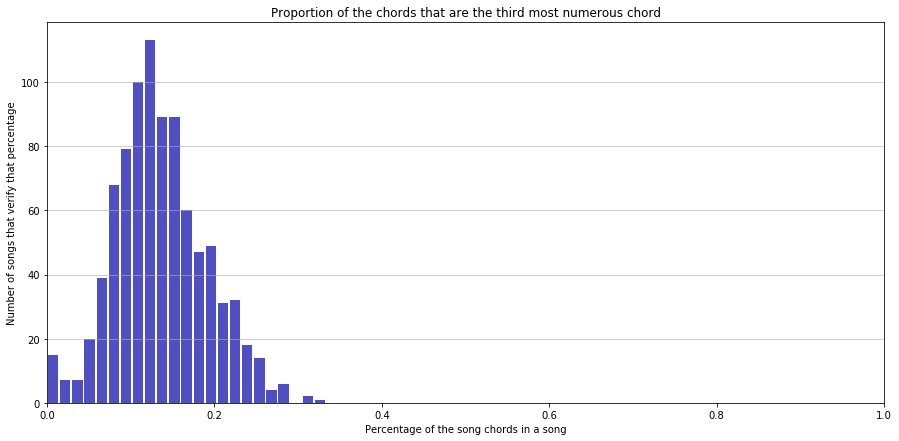

In [151]:
plt.figure()
plt.rcParams["figure.figsize"] = (15,7)

n, bins, patches = plt.hist(x=third_chords/song_len, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlim(0.0, 1.0)
plt.xlabel('Percentage of the song chords in a song')
plt.ylabel('Number of songs that verify that percentage')
plt.title('Proportion of the chords that are the third most numerous chord')